<div class="alert alert-block alert-info">
<b>Deadline:</b> March 15, 2023 (Wednesday) 23:00
</div>

# Exercise 1. Convolutional neural networks. LeNet-5.

In this exercise, you will train a very simple convolutional neural network used for image classification tasks.

You may find it useful to look at this tutorial:
* [Neural Networks](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py)

In [32]:
skip_training = True  # Set this flag to True before validation and submission

In [33]:
# During evaluation, this cell sets skip_training to True
# skip_training = True

import tools, warnings
warnings.showwarning = tools.customwarn

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import tools
import tests

In [35]:
# When running on your own computer, you can specify the data directory by:
# data_dir = tools.select_data_dir('/your/local/data/directory')
data_dir = tools.select_data_dir()

The data directory is /coursedata


In [36]:
# Select the device for training (use GPU if you have one)
#device = torch.device('cuda:0')
device = torch.device('cpu')

In [37]:
if skip_training:
    # The models are always evaluated on CPU
    device = torch.device("cpu")

## FashionMNIST dataset

Let us use the FashionMNIST dataset. It consists of 60,000 training images of 10 classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'.

In [38]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Transform to tensor
    transforms.Normalize((0.5,), (0.5,))  # Scale images to [-1, 1]
])

trainset = torchvision.datasets.FashionMNIST(root=data_dir, train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root=data_dir, train=False, download=True, transform=transform)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
           'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=5, shuffle=False)

Let us visualize the data.

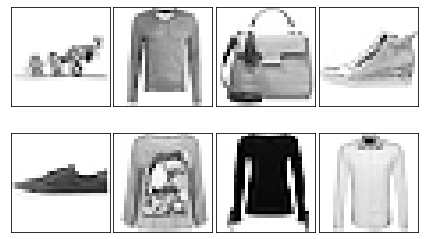

In [39]:
images, labels = next(iter(trainloader))
tests.plot_images(images[:8], n_rows=2)

# 1. Simple convolutional network

In the first exercise, your task is to create a convolutional neural network with the architecture inspired by the classical LeNet-5 [(LeCun et al., 1998)](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf).

The architecture of the convolutional network that you need to create:
* 2d convolutional layer with:
    * one input channel
    * 6 output channels
    * kernel size 5 (no padding)
    * followed by ReLU
* Max-pooling layer with kernel size 2 and stride 2
* 2d convolutional layer with:
    * 16 output channels
    * kernel size 5 (no padding)
    * followed by ReLU
* Max-pooling layer with kernel size 2 and stride 2
* A fully-connected layer with:
    * 120 outputs
    * followed by ReLU
* A fully-connected layer with:
    * 84 outputs
    * followed by ReLU
* A fully-connected layer with 10 outputs and without nonlinearity.

In [40]:
# The input shape is torch.Size([1, 28, 28])
#                            channel width length
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # YOUR CODE HERE
        #raise NotImplementedError()
        
        # Convolutional layer
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, 
        # dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        
        # Max pooling layer
        # torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, 
        #                    return_indices=False, ceil_mode=False)
        
        # ReLU function
        # torch.nn.ReLU(inplace=False)
        
        # Fully connected (fc) layer
        # torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
        
        # shape ([1, 28, 28])
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        # shape ([6, 24, 24])
        self.relu1 = nn.ReLU()
        # shape ([6, 24, 24])
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # shape ([6, 12, 12])
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # shape ([16, 8, 8])
        self.relu2 = nn.ReLU()
        # shape ([16, 8, 8])
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # shape ([16, 4, 4])
        # in_features = latest output channels * shape of one channel (4 x 4) 
        self.fc1 = nn.Linear(in_features=16 * 4 * 4, out_features=120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        """
        Args:
          x of shape (batch_size, 1, 28, 28): Input images.
        
        Returns:
          y of shape (batch_size, 10): Outputs of the network.
        """
        # YOUR CODE HERE
        #raise NotImplementedError()

        y = self.conv1(x) 
        # shape ([6, 24, 24])
        y = self.relu1(y) 
        # shape ([6, 24, 24])
        y = self.maxpool1(y)
        # shape ([6, 12, 12])
        y = self.conv2(y)
        # shape ([16, 8, 8])
        y = self.relu2(y)
        # shape ([16, 8, 8])
        y = self.maxpool2(y)
        # shape ([16, 4, 4])
        # in_features = latest output channels * shape of one channel (4 x 4) 
        
        # Flatten the tensor
        feature = 1
        for size in y.size()[1:]:
            feature *= size
        y = y.view(-1, feature)
        
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        return y
        

In [41]:
def test_LeNet5_shapes():
    net = LeNet5()

    # Feed a batch of images from the training data to test the network
    with torch.no_grad():
        images, labels = next(iter(trainloader))
        print('Shape of the input tensor:', images.shape)

        y = net(images)
        assert y.shape == torch.Size([trainloader.batch_size, 10]), "Bad shape of y: y.shape={}".format(y.shape)

    print('Success')

test_LeNet5_shapes()

Shape of the input tensor: torch.Size([32, 1, 28, 28])
Success


In [42]:
def test_LeNet5():
    net = LeNet5()
    
    # get gradients for parameters in forward path
    net.zero_grad()
    x = torch.randn(1, 1, 28, 28)
    outputs = net(x)
    outputs[0,0].backward()
    
    parameter_shapes = sorted(tuple(p.shape) for p in net.parameters() if p.grad is not None)
    print(parameter_shapes)
    expected = [(6,), (6, 1, 5, 5), (10,), (10, 84), (16,), (16, 6, 5, 5), (84,), (84, 120), (120,), (120, 256)]
    assert parameter_shapes == expected, "Wrong number of training parameters."
    
    print('Success')

test_LeNet5()

[(6,), (6, 1, 5, 5), (10,), (10, 84), (16,), (16, 6, 5, 5), (84,), (84, 120), (120,), (120, 256)]
Success


# Train the network

In [43]:
# This function computes the accuracy on the test dataset
def compute_accuracy(net, testloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

### Training loop

Your task is to implement the training loop. The recommended hyperparameters:
* Stochastic Gradient Descent (SGD) optimizer with learning rate 0.001 and momentum 0.9.
* Cross-entropy loss. Note that we did not use softmax nonlinearity in the final layer of our network. Therefore, we need to use a loss function with log_softmax implemented, such as [nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss).
* Number of epochs: 10. Please use mini-batches produces by `trainloader` defined above.

We recommend you to use function `compute_accuracy()` defined above to track the accuracy during training. The test accuracy should be above 0.87.

In [44]:
# Create network
net = LeNet5()

In [45]:
# Implement the training loop in this cell


if not skip_training:
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    # YOUR CODE HERE

    # Zero out the gradients
    net.zero_grad()
    # The loss function
    crossEntropyLoss = nn.CrossEntropyLoss()
    # The optimizers
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    
    # Number of training epochs 
    epochs = 10
    # Training over the dataset multiple times
    for epoch in range(epochs):
        # Before training the network, we call net.train() 
        # to set it in training mode. Similarly, before testing 
        # for predictions, we call net.eval() to set it in evaluation mode
        
        net.train()
        for images, labels in trainloader:
            optimizer.zero_grad()
            labels_pred = net(images)
            loss = crossEntropyLoss(labels_pred, labels)
            loss.backward()
            optimizer.step()
        
        accuracy = compute_accuracy(net,testloader)
        print(f"Accuracy at epoch {epoch}: {accuracy}")

In [46]:
# Save the model to disk (the pth-files will be submitted automatically together with your notebook)
# Set confirm=False if you do not want to be asked for confirmation before saving.
if not skip_training:
    tools.save_model(net, '1_lenet5.pth', confirm=False)

In [47]:
if skip_training:
    net = LeNet5()
    tools.load_model(net, '1_lenet5.pth', device)

Model loaded from 1_lenet5.pth.


Ground truth labels:  Ankle boot   Pullover    Trouser    Trouser      Shirt
Predictions:          Ankle boot   Pullover    Trouser    Trouser      Shirt


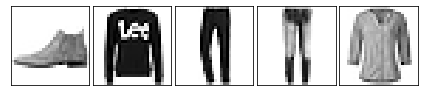

In [48]:
# Display random images from the test set, the ground truth labels and the network's predictions
net.eval()
with torch.no_grad():
    images, labels = iter(testloader).next()
    tests.plot_images(images[:5], n_rows=1)
    
    # Compute predictions
    images = images.to(device)
    y = net(images)

print('Ground truth labels: ', ' '.join('%10s' % classes[labels[j]] for j in range(5)))
print('Predictions:         ', ' '.join('%10s' % classes[j] for j in y.argmax(dim=1)))

In [49]:
# Compute the accuracy on the test set
accuracy = compute_accuracy(net, testloader)
print('Accuracy of the network on the test images: %.3f' % accuracy)
assert accuracy > 0.85, "Poor accuracy {:.3f}".format(accuracy)
print('Success')

Accuracy of the network on the test images: 0.876
Success
